In [11]:
import matplotlib.pyplot as plt
import numpy as np
import math
import time


# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble, ClassicalRegister, QuantumRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
import qiskit.quantum_info as qi 
from qiskit.extensions import UnitaryGate
from qiskit.extensions import HamiltonianGate
from qiskit.circuit.library import PhaseEstimation
from qiskit.algorithms import HamiltonianPhaseEstimation
 

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

# import basic plot tools
from qiskit.visualization import plot_histogram

ibmqfactory.load_account:WARNING:2023-03-02 20:14:39,526: Credentials are already in use. The existing account in the session will be replaced.


In [12]:
H = np.eye(16)


In [13]:
U = HamiltonianGate(H,2*np.pi,label="CU") #
print(U)

Instruction(name='hamiltonian', num_qubits=4, num_clbits=0, params=[array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j

In [14]:
#HamiltonianPhaseEstimation(U)

In [15]:
qpe = QuantumCircuit(7, 3)
#qpe.draw(scale=2)

In [16]:
for qubit in range(3):
    qpe.h(qubit)
#qpe.draw(scale=2)

In [17]:
#PhaseEstimation(3,U)

In [18]:
CU = U.control(label="control")
print(CU)

Instruction(name='chamiltonian', num_qubits=5, num_clbits=0, params=[array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.

In [19]:
repetitions = 1
#CU = U#.to_gate().control(1)
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.append(CU,[counting_qubit,3,4,5,6])
        #qpe.cp(math.pi/4, counting_qubit, 3); # This is CU
    repetitions *= 2
#qpe.draw(scale=1.5)

In [20]:
#straight from the tutorial:
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)

In [21]:
qpe.barrier()
# Apply inverse QFT
qft_dagger(qpe, 3)
# Measure
qpe.barrier()
for n in range(3):
    qpe.measure(n,n)

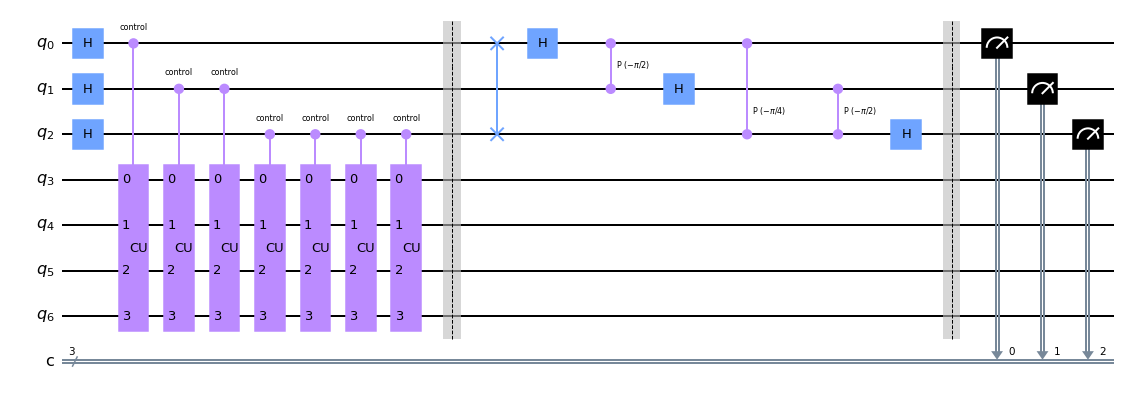

In [22]:
qpe.draw()

--- 0.11465048789978027 seconds ---


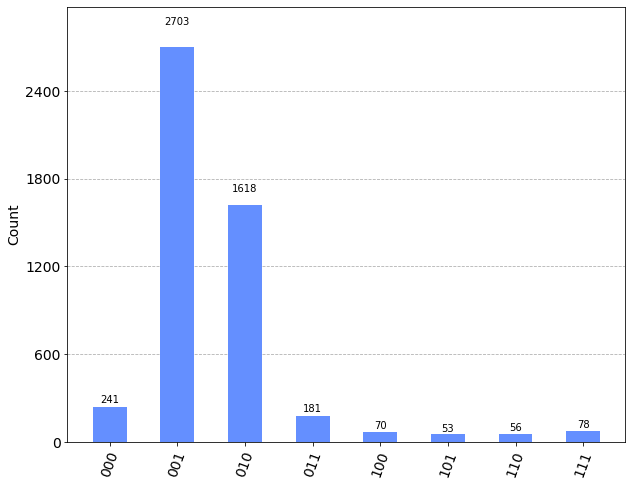

In [15]:
start_time = time.time()
aer_sim = Aer.get_backend('aer_simulator')
shots = 5000#2048
t_qpe = transpile(qpe, aer_sim)
qobj = assemble(t_qpe, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
print("--- %s seconds ---" % (time.time() - start_time))
plot_histogram(answer,figsize=(10,8))


In [16]:
print(answer)

{'101': 53, '111': 78, '011': 181, '110': 56, '000': 241, '010': 1618, '001': 2703, '100': 70}


In [26]:
print(max(answer, key=answer.get))

000111100


In [27]:
print(sorted(answer, key=answer.get, reverse=True)[0:8])

['000111100', '001000110', '101100011', '101100010', '111110001', '001000101', '111110000', '001000111']


In [28]:
myList = sorted(answer, key=answer.get, reverse=True)[0:8]
output_list = []
for element in myList:
    value = int(element,2)
    output_list.append(value)
print("The input list is:", myList)
print("The output list is:", sorted(output_list))

The input list is: ['000111100', '001000110', '101100011', '101100010', '111110001', '001000101', '111110000', '001000111']
The output list is: [60, 69, 70, 71, 354, 355, 496, 497]
